In [1]:
import sys
import os
import numpy as np
import pandas as pd
import gensim
import matplotlib.colors as mcolors
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from spacy.lang.en.stop_words import STOP_WORDS as en_stop
from spacy.lang.es.stop_words import STOP_WORDS as es_stop
sys.path.append(os.path.realpath('../'))
sys.path.append(os.path.realpath('../../'))

from preprocess_data import Preprocces


Loading stopwords

In [2]:
stop_words_en = list(en_stop)
stop_words_es = list(es_stop)
stop_words_fr = list(fr_stop)


**Pre-proccesing data**

In [3]:
data = '../../data/dataset_multilng.csv'

preprocces = Preprocces(data)
df,stats_words = preprocces.clean_dataframe()

[2020-08-03][13:02:09][preprocess_data][INFO] Remove column :Unnamed: 0
[2020-08-03][13:02:09][preprocess_data][INFO] Shape of dataframe:(23128, 3)
[2020-08-03][13:02:09][preprocess_data][INFO] Checking is there is null values
[2020-08-03][13:02:09][preprocess_data][INFO] Remove null values: 1
[2020-08-03][13:02:09][preprocess_data][INFO] Remove digits and digits with words example : 460bc --> ""
[2020-08-03][13:02:27][preprocess_data][INFO] Transform words to lowercase example: Electronics --> electronics
[2020-08-03][13:02:27][preprocess_data][INFO] Remove special characters example : $# -->"" 
[2020-08-03][13:02:55][preprocess_data][INFO] Remove words with lenght less than three example : for --> "" 
[2020-08-03][13:02:58][preprocess_data][INFO] Remove stop words in any language example : para --> "" 
[2020-08-03][13:05:33][preprocess_data][INFO] Remove duplicates values: 120
[2020-08-03][13:05:33][preprocess_data][INFO] Dataframe is cleaned
[2020-08-03][13:05:33][preprocess_data][I

Split Dataframe in languages

In [4]:
df_en = df[df.language=='en']
df_es = df[df.language=='es']
df_fr = df[df.language=='fr']

In [5]:
df_en.head()

,Text,language,label,Cleaned_text
0,"i read this book because in my town, everyone ...",en,APR,read book town uses order pharmacist advised t...
1,recipes appreciated by the family (small and l...,en,APR,recipes appreciated family small large regime ...
2,i say no to ease ..... and not to the author w...,en,APR,ease author effort meet family writing book kn...
3,milady has found a good vein: anita blake. bas...,en,APR,milady found good vein anita blake based obser...
4,"460 bc, somewhere in greece: ""gentlemen, i dec...",en,APR,greece gentlemen decided visit known world tra...


Split the text in words for each languages

In [6]:
text_en = df_en['Cleaned_text'].apply(lambda x: x.split())
text_es = df_es['Cleaned_text'].apply(lambda x: x.split())
text_fr = df_fr['Cleaned_text'].apply(lambda x: x.split())

In [7]:
text_en[:5],text_es[:5],text_fr[:5]

(0    [read, book, town, uses, order, pharmacist, ad...
 1    [recipes, appreciated, family, small, large, r...
 2    [ease, author, effort, meet, family, writing, ...
 3    [milady, found, good, vein, anita, blake, base...
 4    [greece, gentlemen, decided, visit, known, wor...
 Name: Cleaned_text, dtype: object,
 8372    [pafamos, lagunas, palos, indio, fegundo, lleg...
 8373    [puesta, vnos, llanos, vnas, sierras, hallamos...
 8374    [tierra, maior, defde, defembarcamos, hafta, e...
 8375    [xxxvi, hecimos, iglesias, tierra, espantados,...
 8376    [asombra, imaginar, hubiera, cerebro, bellamen...
 Name: Cleaned_text, dtype: object,
 3600    [aimé, premiers, albums, petit, abordaient, am...
 3601    [joins, commentaires, satisfaits, dirait, scén...
 3602    [parution, livre, rencontré, audience, suscite...
 3603    [découvre, douglas, kennedy, aimerais, expliqu...
 3604    [acheté, livre, lecture, commentaires, goûts, ...
 Name: Cleaned_text, dtype: object)

Create a dictionary of text

In [8]:
dictionary_en = gensim.corpora.Dictionary(text_en)
dictionary_es = gensim.corpora.Dictionary(text_es)
dictionary_fr = gensim.corpora.Dictionary(text_fr)

[2020-08-03][13:05:40][gensim.corpora.dictionary][INFO] adding document #0 to Dictionary(0 unique tokens: [])
[2020-08-03][13:05:47][gensim.corpora.dictionary][INFO] built Dictionary(303894 unique tokens: ['able', 'advise', 'advised', 'afraid', 'agreed']...) from 9647 documents (total 5092858 corpus positions)
[2020-08-03][13:05:47][gensim.corpora.dictionary][INFO] adding document #0 to Dictionary(0 unique tokens: [])
[2020-08-03][13:05:50][gensim.corpora.dictionary][INFO] built Dictionary(266616 unique tokens: ['abfcondidos', 'acometiefen', 'acometieron', 'agua', 'alamo']...) from 5164 documents (total 2497538 corpus positions)
[2020-08-03][13:05:50][gensim.corpora.dictionary][INFO] adding document #0 to Dictionary(0 unique tokens: [])
[2020-08-03][13:05:55][gensim.corpora.dictionary][INFO] built Dictionary(318625 unique tokens: ['abordaient', 'aimé', 'albums', 'amour', 'bref']...) from 8196 documents (total 3230728 corpus positions)


Filter out tokens that appears at less in 100 documents and no more than 0.5 total of documents

In [9]:
dictionary_en.filter_extremes(no_below=100, no_above=0.5, keep_n=100000)

[2020-08-03][13:05:55][gensim.corpora.dictionary][INFO] discarding 298492 tokens: [('annotated', 38), ('capsules', 16), ('clicks', 10), ('clients', 68), ('consolidation', 24), ('deformed', 37), ('euros', 42), ('kilo', 11), ('offend', 63), ('outperforms', 2)]...
[2020-08-03][13:05:55][gensim.corpora.dictionary][INFO] keeping 5402 tokens which were in no less than 100 and no more than 4823 (=50.0%) documents
[2020-08-03][13:05:55][gensim.corpora.dictionary][INFO] resulting dictionary: Dictionary(5402 unique tokens: ['able', 'advise', 'advised', 'afraid', 'agreed']...)


In [10]:
dictionary_es.filter_extremes(no_below=100, no_above=0.5, keep_n=100000)

[2020-08-03][13:05:55][gensim.corpora.dictionary][INFO] discarding 264001 tokens: [('abfcondidos', 1), ('acometiefen', 1), ('acometieron', 13), ('alamo', 3), ('apeafen', 1), ('apeò', 1), ('aprovechaba', 20), ('arboles', 10), ('baxo', 10), ('bueltas', 1)]...
[2020-08-03][13:05:55][gensim.corpora.dictionary][INFO] keeping 2615 tokens which were in no less than 100 and no more than 2582 (=50.0%) documents
[2020-08-03][13:05:55][gensim.corpora.dictionary][INFO] resulting dictionary: Dictionary(2615 unique tokens: ['agua', 'armas', 'caballo', 'caballos', 'daba']...)


In [11]:
dictionary_fr.filter_extremes(no_below=100, no_above=0.5, keep_n=100000)

[2020-08-03][13:05:56][gensim.corpora.dictionary][INFO] discarding 315333 tokens: [('abordaient', 2), ('caca', 5), ('deçu', 5), ('gags', 19), ('gout', 24), ('humoristique', 25), ('pipi', 2), ('rigole', 8), ('tombé', 76), ('vulgaire', 32)]...
[2020-08-03][13:05:56][gensim.corpora.dictionary][INFO] keeping 3292 tokens which were in no less than 100 and no more than 4098 (=50.0%) documents
[2020-08-03][13:05:56][gensim.corpora.dictionary][INFO] resulting dictionary: Dictionary(3292 unique tokens: ['aimé', 'albums', 'amour', 'bref', 'enfants']...)


Transform text to bag-of-words

In [12]:
bow_corpus_en = [dictionary_en.doc2bow(doc) for doc in text_en]
bow_corpus_es = [dictionary_es.doc2bow(doc) for doc in text_es]
bow_corpus_fr = [dictionary_fr.doc2bow(doc) for doc in text_fr]


In [13]:
bow_corpus_en[2]

[(7, 2),
 (10, 2),
 (19, 1),
 (43, 1),
 (48, 1),
 (62, 1),
 (66, 1),
 (74, 2),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 1),
 (79, 1),
 (80, 1),
 (81, 1),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 2),
 (87, 2),
 (88, 1),
 (89, 1),
 (90, 1),
 (91, 1),
 (92, 1),
 (93, 1),
 (94, 1),
 (95, 1),
 (96, 1)]

In [15]:
bow_doc_2_en = bow_corpus_en[2]
for i in range(len(bow_doc_2_en)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_2_en[i][0], 
                                               dictionary_en[bow_doc_2_en[i][0]], bow_doc_2_en[i][1]))

Word 7 ("author") appears 2 time.
Word 10 ("book") appears 2 time.
Word 19 ("effort") appears 1 time.
Word 43 ("read") appears 1 time.
Word 48 ("speak") appears 1 time.
Word 62 ("want") appears 1 time.
Word 66 ("family") appears 1 time.
Word 74 ("artist") appears 2 time.
Word 75 ("ashamed") appears 1 time.
Word 76 ("association") appears 1 time.
Word 77 ("brother") appears 1 time.
Word 78 ("character") appears 1 time.
Word 79 ("correctly") appears 1 time.
Word 80 ("death") appears 1 time.
Word 81 ("ease") appears 1 time.
Word 82 ("enjoy") appears 1 time.
Word 83 ("fans") appears 1 time.
Word 84 ("frankly") appears 1 time.
Word 85 ("fully") appears 1 time.
Word 86 ("good") appears 2 time.
Word 87 ("gregory") appears 2 time.
Word 88 ("interested") appears 1 time.
Word 89 ("knows") appears 1 time.
Word 90 ("lifetime") appears 1 time.
Word 91 ("meet") appears 1 time.
Word 92 ("pain") appears 1 time.
Word 93 ("place") appears 1 time.
Word 94 ("sister") appears 1 time.
Word 95 ("wanting") ap

# Topics for English documents

In [16]:
Lda = gensim.models.ldamodel.LdaModel

In [17]:
lda_model_en = Lda(bow_corpus_en, num_topics=10, chunksize=1000,id2word=dictionary_en, passes=10,alpha='symmetric',iterations=100,
                per_word_topics=True)

[2020-08-03][13:07:07][gensim.models.ldamodel][INFO] using symmetric alpha at 0.1
[2020-08-03][13:07:07][gensim.models.ldamodel][INFO] using symmetric eta at 0.1
[2020-08-03][13:07:07][gensim.models.ldamodel][INFO] using serial LDA version on this node
[2020-08-03][13:07:07][gensim.models.ldamodel][INFO] running online (multi-pass) LDA training, 10 topics, 10 passes over the supplied corpus of 9647 documents, updating model once every 1000 documents, evaluating perplexity every 9647 documents, iterating 100x with a convergence threshold of 0.001000
[2020-08-03][13:07:07][gensim.models.ldamodel][INFO] PROGRESS: pass 0, at document #1000/9647
[2020-08-03][13:07:08][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 9647 documents
[2020-08-03][13:07:08][gensim.models.ldamodel][INFO] topic #6 (0.100): 0.045*"book" + 0.014*"read" + 0.011*"author" + 0.009*"good" + 0.009*"like" + 0.009*"time" + 0.008*"writing" + 0.007*"pages" + 0.007*"little" + 0.007*"story"
[20

[2020-08-03][13:07:11][gensim.models.ldamodel][INFO] topic #7 (0.100): 0.008*"system" + 0.008*"west" + 0.007*"body" + 0.007*"east" + 0.006*"garden" + 0.006*"june" + 0.006*"order" + 0.005*"said" + 0.005*"heat" + 0.005*"life"
[2020-08-03][13:07:11][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.008*"night" + 0.007*"office" + 0.006*"time" + 0.006*"said" + 0.006*"gold" + 0.006*"figure" + 0.005*"black" + 0.005*"voice" + 0.005*"running" + 0.005*"dress"
[2020-08-03][13:07:11][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.009*"went" + 0.008*"party" + 0.008*"came" + 0.008*"continued" + 0.006*"house" + 0.006*"time" + 0.006*"fear" + 0.005*"light" + 0.005*"good" + 0.005*"years"
[2020-08-03][13:07:11][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.014*"looked" + 0.009*"seeing" + 0.009*"government" + 0.008*"face" + 0.008*"eyes" + 0.008*"time" + 0.007*"girl" + 0.007*"priest" + 0.006*"love" + 0.006*"know"
[2020-08-03][13:07:11][gensim.models.ldamodel][INFO] topic diff=0.884277, rho=0.408248


[2020-08-03][13:07:16][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.005*"music" + 0.005*"world" + 0.005*"roman" + 0.005*"river" + 0.005*"popular" + 0.005*"album" + 0.005*"official" + 0.004*"local" + 0.004*"called" + 0.004*"largest"
[2020-08-03][13:07:16][gensim.models.ldamodel][INFO] topic diff=0.193318, rho=0.293017
[2020-08-03][13:07:16][gensim.models.ldamodel][INFO] PROGRESS: pass 1, at document #2000/9647
[2020-08-03][13:07:17][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 9647 documents
[2020-08-03][13:07:17][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.015*"category" + 0.010*"king" + 0.010*"called" + 0.009*"generally" + 0.008*"forms" + 0.008*"software" + 0.006*"campaign" + 0.006*"known" + 0.006*"greater" + 0.006*"produce"
[2020-08-03][13:07:17][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.025*"film" + 0.008*"music" + 0.008*"london" + 0.008*"series" + 0.007*"office" + 0.007*"million" + 0.006*"played" + 0.005*"apple" + 0.005*"award

[2020-08-03][13:07:20][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.016*"film" + 0.008*"music" + 0.008*"series" + 0.007*"office" + 0.007*"night" + 0.006*"london" + 0.006*"award" + 0.006*"time" + 0.006*"temple" + 0.005*"black"
[2020-08-03][13:07:20][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.008*"party" + 0.008*"house" + 0.008*"came" + 0.007*"continued" + 0.007*"went" + 0.006*"time" + 0.006*"home" + 0.006*"good" + 0.006*"light" + 0.005*"movement"
[2020-08-03][13:07:20][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.013*"august" + 0.013*"spanish" + 0.012*"league" + 0.010*"category" + 0.007*"madrid" + 0.007*"council" + 0.007*"september" + 0.007*"arms" + 0.007*"european" + 0.006*"spain"
[2020-08-03][13:07:20][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.011*"university" + 0.007*"german" + 0.006*"state" + 0.006*"later" + 0.006*"city" + 0.005*"press" + 0.005*"french" + 0.005*"area" + 0.005*"english" + 0.005*"number"
[2020-08-03][13:07:20][gensim.models.ldamodel][INFO] top

[2020-08-03][13:07:26][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.012*"party" + 0.009*"continued" + 0.007*"movement" + 0.007*"house" + 0.006*"time" + 0.006*"april" + 0.005*"actor" + 0.005*"good" + 0.005*"appeared" + 0.005*"position"
[2020-08-03][13:07:26][gensim.models.ldamodel][INFO] topic diff=0.185565, rho=0.281194
[2020-08-03][13:07:26][gensim.models.ldamodel][INFO] PROGRESS: pass 2, at document #3000/9647
[2020-08-03][13:07:26][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 9647 documents
[2020-08-03][13:07:26][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.020*"august" + 0.016*"league" + 0.014*"spanish" + 0.012*"category" + 0.009*"september" + 0.009*"european" + 0.009*"guitar" + 0.008*"prince" + 0.008*"spain" + 0.008*"duke"
[2020-08-03][13:07:26][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.011*"university" + 0.008*"german" + 0.007*"state" + 0.007*"later" + 0.006*"french" + 0.006*"area" + 0.006*"english" + 0.006*"press" + 0.006*"m

[2020-08-03][13:07:30][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.048*"category" + 0.013*"world" + 0.011*"international" + 0.010*"team" + 0.010*"ndash" + 0.009*"year" + 0.009*"people" + 0.009*"british" + 0.008*"season" + 0.008*"march"
[2020-08-03][13:07:30][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.007*"century" + 0.006*"river" + 0.005*"roman" + 0.005*"early" + 0.005*"image" + 0.005*"example" + 0.005*"popular" + 0.005*"called" + 0.004*"church" + 0.004*"official"
[2020-08-03][13:07:30][gensim.models.ldamodel][INFO] topic #7 (0.100): 0.018*"nbsp" + 0.014*"city" + 0.013*"quot" + 0.009*"system" + 0.009*"south" + 0.008*"west" + 0.007*"north" + 0.007*"june" + 0.006*"east" + 0.006*"states"
[2020-08-03][13:07:30][gensim.models.ldamodel][INFO] topic diff=0.186109, rho=0.281194
[2020-08-03][13:07:30][gensim.models.ldamodel][INFO] PROGRESS: pass 2, at document #9000/9647
[2020-08-03][13:07:31][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 9647 do

[2020-08-03][13:07:33][gensim.models.ldamodel][INFO] topic diff=0.183789, rho=0.270696
[2020-08-03][13:07:33][gensim.models.ldamodel][INFO] PROGRESS: pass 3, at document #4000/9647
[2020-08-03][13:07:34][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 9647 documents
[2020-08-03][13:07:34][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.011*"king" + 0.010*"called" + 0.008*"software" + 0.007*"forms" + 0.006*"language" + 0.006*"generally" + 0.006*"greek" + 0.006*"blood" + 0.006*"greater" + 0.005*"person"
[2020-08-03][13:07:34][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.011*"university" + 0.008*"german" + 0.008*"state" + 0.007*"french" + 0.007*"later" + 0.007*"area" + 0.006*"english" + 0.006*"press" + 0.006*"government" + 0.006*"members"
[2020-08-03][13:07:34][gensim.models.ldamodel][INFO] topic #6 (0.100): 0.029*"album" + 0.014*"national" + 0.011*"band" + 0.008*"generated" + 0.008*"rock" + 0.008*"time" + 0.008*"songs" + 0.007*"released" + 0.007*"

[2020-08-03][13:07:38][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.052*"category" + 0.016*"world" + 0.012*"international" + 0.011*"year" + 0.011*"team" + 0.010*"ndash" + 0.009*"british" + 0.009*"season" + 0.009*"people" + 0.009*"march"
[2020-08-03][13:07:38][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.011*"king" + 0.010*"called" + 0.008*"greek" + 0.007*"forms" + 0.007*"language" + 0.007*"blood" + 0.006*"software" + 0.006*"given" + 0.006*"person" + 0.006*"campaign"
[2020-08-03][13:07:38][gensim.models.ldamodel][INFO] topic diff=0.129223, rho=0.270696
[2020-08-03][13:07:39][gensim.models.ldamodel][INFO] -7.943 per-word bound, 246.0 perplexity estimate based on a held-out corpus of 647 documents with 370221 words
[2020-08-03][13:07:39][gensim.models.ldamodel][INFO] PROGRESS: pass 3, at document #9647/9647
[2020-08-03][13:07:39][gensim.models.ldamodel][INFO] merging changes from 647 documents into a model of 9647 documents
[2020-08-03][13:07:39][gensim.models.ldamodel][INFO] to

[2020-08-03][13:07:41][gensim.models.ldamodel][INFO] topic #7 (0.100): 0.014*"city" + 0.013*"nbsp" + 0.010*"south" + 0.009*"quot" + 0.009*"system" + 0.008*"north" + 0.008*"west" + 0.007*"population" + 0.007*"june" + 0.007*"east"
[2020-08-03][13:07:41][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.009*"river" + 0.007*"century" + 0.005*"province" + 0.005*"church" + 0.005*"called" + 0.005*"sound" + 0.005*"image" + 0.005*"roman" + 0.005*"early" + 0.005*"known"
[2020-08-03][13:07:41][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.023*"said" + 0.015*"know" + 0.012*"love" + 0.011*"good" + 0.011*"like" + 0.010*"time" + 0.009*"face" + 0.008*"come" + 0.008*"life" + 0.008*"great"
[2020-08-03][13:07:41][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.012*"came" + 0.009*"house" + 0.008*"went" + 0.008*"time" + 0.007*"head" + 0.006*"eyes" + 0.006*"poor" + 0.006*"days" + 0.006*"good" + 0.006*"home"
[2020-08-03][13:07:41][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.016*"spanish" + 0.011*

[2020-08-03][13:07:46][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.018*"said" + 0.011*"like" + 0.010*"capital" + 0.010*"external" + 0.009*"time" + 0.009*"life" + 0.009*"good" + 0.009*"love" + 0.009*"know" + 0.008*"great"
[2020-08-03][13:07:46][gensim.models.ldamodel][INFO] topic diff=0.088169, rho=0.261292
[2020-08-03][13:07:46][gensim.models.ldamodel][INFO] PROGRESS: pass 5, at document #1000/9647
[2020-08-03][13:07:47][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 9647 documents
[2020-08-03][13:07:47][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.010*"king" + 0.010*"called" + 0.008*"software" + 0.008*"greek" + 0.008*"language" + 0.007*"forms" + 0.007*"blood" + 0.006*"person" + 0.006*"given" + 0.006*"nature"
[2020-08-03][13:07:47][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.052*"category" + 0.018*"world" + 0.012*"international" + 0.012*"team" + 0.011*"year" + 0.010*"ndash" + 0.009*"season" + 0.009*"game" + 0.009*"british" + 0.009*"ma

[2020-08-03][13:07:49][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.010*"called" + 0.009*"blood" + 0.009*"reason" + 0.009*"king" + 0.008*"nature" + 0.007*"language" + 0.007*"people" + 0.006*"given" + 0.006*"person" + 0.006*"word"
[2020-08-03][13:07:49][gensim.models.ldamodel][INFO] topic #7 (0.100): 0.015*"city" + 0.015*"nbsp" + 0.010*"system" + 0.010*"south" + 0.009*"north" + 0.009*"quot" + 0.008*"west" + 0.008*"population" + 0.007*"east" + 0.007*"species"
[2020-08-03][13:07:49][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.020*"film" + 0.018*"music" + 0.013*"best" + 0.010*"series" + 0.009*"played" + 0.008*"black" + 0.008*"office" + 0.008*"story" + 0.007*"american" + 0.007*"character"
[2020-08-03][13:07:49][gensim.models.ldamodel][INFO] topic diff=0.194710, rho=0.252804
[2020-08-03][13:07:49][gensim.models.ldamodel][INFO] PROGRESS: pass 5, at document #7000/9647
[2020-08-03][13:07:49][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 9647 docum

[2020-08-03][13:07:53][gensim.models.ldamodel][INFO] topic diff=0.180651, rho=0.245094
[2020-08-03][13:07:53][gensim.models.ldamodel][INFO] PROGRESS: pass 6, at document #2000/9647
[2020-08-03][13:07:54][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 9647 documents
[2020-08-03][13:07:54][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.011*"house" + 0.009*"came" + 0.009*"april" + 0.008*"continued" + 0.008*"time" + 0.007*"head" + 0.007*"went" + 0.006*"days" + 0.006*"home" + 0.006*"gave"
[2020-08-03][13:07:54][gensim.models.ldamodel][INFO] topic #6 (0.100): 0.016*"album" + 0.016*"national" + 0.012*"band" + 0.009*"generated" + 0.009*"released" + 0.009*"group" + 0.008*"time" + 0.008*"single" + 0.007*"movie" + 0.007*"player"
[2020-08-03][13:07:54][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.051*"category" + 0.019*"world" + 0.012*"international" + 0.012*"year" + 0.012*"team" + 0.010*"ndash" + 0.009*"game" + 0.009*"season" + 0.009*"british" + 0.009*"m

[2020-08-03][13:07:56][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.010*"called" + 0.009*"blood" + 0.008*"language" + 0.007*"nature" + 0.007*"king" + 0.007*"reason" + 0.007*"greek" + 0.006*"given" + 0.006*"word" + 0.006*"theory"
[2020-08-03][13:07:56][gensim.models.ldamodel][INFO] topic #6 (0.100): 0.018*"album" + 0.014*"national" + 0.011*"band" + 0.009*"group" + 0.009*"released" + 0.009*"time" + 0.008*"rock" + 0.008*"single" + 0.008*"generated" + 0.006*"record"
[2020-08-03][13:07:56][gensim.models.ldamodel][INFO] topic diff=0.224829, rho=0.245094
[2020-08-03][13:07:56][gensim.models.ldamodel][INFO] PROGRESS: pass 6, at document #8000/9647
[2020-08-03][13:07:57][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 9647 documents
[2020-08-03][13:07:57][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.013*"university" + 0.010*"state" + 0.009*"german" + 0.008*"later" + 0.008*"press" + 0.008*"french" + 0.008*"area" + 0.007*"category" + 0.006*"english" + 0

[2020-08-03][13:08:01][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.009*"called" + 0.008*"language" + 0.007*"greek" + 0.007*"software" + 0.007*"blood" + 0.007*"form" + 0.006*"case" + 0.006*"theory" + 0.006*"forms" + 0.006*"human"
[2020-08-03][13:08:01][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.022*"august" + 0.017*"league" + 0.017*"spanish" + 0.014*"city" + 0.014*"spain" + 0.010*"prince" + 0.010*"guitar" + 0.009*"duke" + 0.008*"death" + 0.008*"blue"
[2020-08-03][13:08:01][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.010*"house" + 0.010*"came" + 0.009*"april" + 0.008*"continued" + 0.008*"time" + 0.007*"head" + 0.007*"went" + 0.006*"days" + 0.006*"said" + 0.006*"gave"
[2020-08-03][13:08:01][gensim.models.ldamodel][INFO] topic #6 (0.100): 0.022*"album" + 0.015*"national" + 0.011*"band" + 0.010*"group" + 0.009*"released" + 0.009*"generated" + 0.009*"time" + 0.008*"single" + 0.008*"rock" + 0.007*"movie"
[2020-08-03][13:08:01][gensim.models.ldamodel][INFO] topic #0 (0.100):

[2020-08-03][13:08:04][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.010*"century" + 0.007*"known" + 0.007*"image" + 0.006*"river" + 0.006*"roman" + 0.006*"party" + 0.005*"modern" + 0.005*"water" + 0.005*"early" + 0.005*"church"
[2020-08-03][13:08:04][gensim.models.ldamodel][INFO] topic diff=0.164250, rho=0.238048
[2020-08-03][13:08:04][gensim.models.ldamodel][INFO] PROGRESS: pass 7, at document #9000/9647
[2020-08-03][13:08:05][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 9647 documents
[2020-08-03][13:08:05][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.009*"called" + 0.008*"greek" + 0.008*"language" + 0.007*"word" + 0.007*"human" + 0.007*"theory" + 0.007*"given" + 0.007*"nature" + 0.007*"form" + 0.007*"case"
[2020-08-03][13:08:05][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.018*"said" + 0.013*"good" + 0.012*"like" + 0.011*"know" + 0.010*"love" + 0.010*"time" + 0.009*"little" + 0.009*"life" + 0.009*"great" + 0.008*"face"
[2020-08-03]

[2020-08-03][13:08:08][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.010*"century" + 0.007*"image" + 0.007*"known" + 0.006*"roman" + 0.006*"party" + 0.005*"modern" + 0.005*"river" + 0.005*"church" + 0.005*"early" + 0.005*"popular"
[2020-08-03][13:08:08][gensim.models.ldamodel][INFO] topic #7 (0.100): 0.019*"nbsp" + 0.016*"city" + 0.011*"south" + 0.011*"system" + 0.010*"north" + 0.010*"quot" + 0.009*"west" + 0.009*"june" + 0.008*"population" + 0.007*"county"
[2020-08-03][13:08:08][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.011*"came" + 0.010*"house" + 0.008*"april" + 0.008*"time" + 0.007*"said" + 0.007*"continued" + 0.007*"head" + 0.007*"went" + 0.007*"days" + 0.006*"gave"
[2020-08-03][13:08:08][gensim.models.ldamodel][INFO] topic #6 (0.100): 0.026*"album" + 0.014*"national" + 0.011*"group" + 0.011*"band" + 0.009*"time" + 0.009*"rock" + 0.009*"released" + 0.008*"generated" + 0.008*"single" + 0.007*"songs"
[2020-08-03][13:08:08][gensim.models.ldamodel][INFO] topic diff=0.14433

[2020-08-03][13:08:11][gensim.models.ldamodel][INFO] topic diff=0.111165, rho=0.231577
[2020-08-03][13:08:12][gensim.models.ldamodel][INFO] -7.916 per-word bound, 241.5 perplexity estimate based on a held-out corpus of 647 documents with 370221 words
[2020-08-03][13:08:12][gensim.models.ldamodel][INFO] PROGRESS: pass 8, at document #9647/9647
[2020-08-03][13:08:13][gensim.models.ldamodel][INFO] merging changes from 647 documents into a model of 9647 documents
[2020-08-03][13:08:13][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.016*"said" + 0.014*"good" + 0.013*"like" + 0.010*"know" + 0.010*"time" + 0.010*"love" + 0.010*"capital" + 0.009*"external" + 0.009*"little" + 0.009*"great"
[2020-08-03][13:08:13][gensim.models.ldamodel][INFO] topic #6 (0.100): 0.016*"album" + 0.016*"national" + 0.012*"band" + 0.010*"group" + 0.010*"released" + 0.009*"generated" + 0.009*"time" + 0.008*"single" + 0.007*"song" + 0.007*"player"
[2020-08-03][13:08:13][gensim.models.ldamodel][INFO] topic #9 (0.100)

[2020-08-03][13:08:14][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.036*"category" + 0.019*"world" + 0.013*"year" + 0.010*"international" + 0.010*"team" + 0.009*"game" + 0.009*"people" + 0.008*"march" + 0.008*"ndash" + 0.008*"season"
[2020-08-03][13:08:14][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.012*"came" + 0.012*"said" + 0.010*"house" + 0.009*"eyes" + 0.008*"time" + 0.008*"went" + 0.007*"head" + 0.007*"days" + 0.007*"hand" + 0.006*"gave"
[2020-08-03][13:08:14][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.018*"said" + 0.017*"good" + 0.016*"know" + 0.013*"like" + 0.013*"love" + 0.010*"time" + 0.010*"little" + 0.009*"great" + 0.009*"face" + 0.009*"beautiful"
[2020-08-03][13:08:14][gensim.models.ldamodel][INFO] topic diff=0.245401, rho=0.225607
[2020-08-03][13:08:14][gensim.models.ldamodel][INFO] PROGRESS: pass 9, at document #6000/9647
[2020-08-03][13:08:15][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 9647 documents
[2020-08-03][

In [18]:
for idx, topic in lda_model_en.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

[2020-08-03][13:08:19][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.010*"century" + 0.007*"known" + 0.007*"image" + 0.006*"roman" + 0.006*"party" + 0.006*"modern" + 0.005*"water" + 0.005*"river" + 0.005*"church" + 0.005*"early"
[2020-08-03][13:08:19][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.011*"april" + 0.011*"house" + 0.010*"came" + 0.010*"said" + 0.008*"time" + 0.008*"continued" + 0.008*"head" + 0.007*"went" + 0.007*"days" + 0.006*"hand"
[2020-08-03][13:08:19][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.045*"category" + 0.021*"world" + 0.013*"international" + 0.013*"year" + 0.012*"team" + 0.011*"ndash" + 0.010*"game" + 0.009*"british" + 0.009*"march" + 0.009*"season"
[2020-08-03][13:08:19][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.012*"university" + 0.011*"state" + 0.010*"category" + 0.009*"german" + 0.008*"later" + 0.008*"king" + 0.007*"press" + 0.007*"french" + 0.007*"include" + 0.006*"members"
[2020-08-03][13:08:19][gensim.models.ldamodel][INFO] topic 

Topic: 0 
Words: 0.010*"century" + 0.007*"known" + 0.007*"image" + 0.006*"roman" + 0.006*"party" + 0.006*"modern" + 0.005*"water" + 0.005*"river" + 0.005*"church" + 0.005*"early"
Topic: 1 
Words: 0.011*"april" + 0.011*"house" + 0.010*"came" + 0.010*"said" + 0.008*"time" + 0.008*"continued" + 0.008*"head" + 0.007*"went" + 0.007*"days" + 0.006*"hand"
Topic: 2 
Words: 0.045*"category" + 0.021*"world" + 0.013*"international" + 0.013*"year" + 0.012*"team" + 0.011*"ndash" + 0.010*"game" + 0.009*"british" + 0.009*"march" + 0.009*"season"
Topic: 3 
Words: 0.012*"university" + 0.011*"state" + 0.010*"category" + 0.009*"german" + 0.008*"later" + 0.008*"king" + 0.007*"press" + 0.007*"french" + 0.007*"include" + 0.006*"members"
Topic: 4 
Words: 0.015*"said" + 0.014*"good" + 0.013*"like" + 0.010*"know" + 0.010*"love" + 0.010*"time" + 0.010*"capital" + 0.009*"little" + 0.009*"external" + 0.009*"great"
Topic: 5 
Words: 0.022*"august" + 0.020*"city" + 0.017*"league" + 0.016*"spanish" + 0.014*"spain" + 

Check words in document 2

In [19]:
df.loc[100]['Cleaned_text']

'like cycle elric volume actually collection stories relationship elric honest pretty marketing scam elric artificially grafted elric saga ends stormbringer'

Testing Model

In [22]:
for index, score in sorted(lda_model_en[bow_corpus_en[100]][0], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_en.print_topic(index, 10)))


Score: 0.40685734152793884	 
Topic: 0.010*"century" + 0.007*"known" + 0.007*"image" + 0.006*"roman" + 0.006*"party" + 0.006*"modern" + 0.005*"water" + 0.005*"river" + 0.005*"church" + 0.005*"early"

Score: 0.3427937924861908	 
Topic: 0.015*"said" + 0.014*"good" + 0.013*"like" + 0.010*"know" + 0.010*"love" + 0.010*"time" + 0.010*"capital" + 0.009*"little" + 0.009*"external" + 0.009*"great"

Score: 0.191986545920372	 
Topic: 0.027*"film" + 0.024*"music" + 0.015*"series" + 0.014*"american" + 0.014*"best" + 0.012*"played" + 0.012*"quot" + 0.010*"award" + 0.008*"story" + 0.008*"office"


In [23]:
def plot_topics_wordcloud(lda_model,stopwords):
    
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

    cloud = WordCloud(stopwords=stopwords,
                      background_color='white',
                      width=2500,
                      height=1800,
                      max_words=10,
                      colormap='tab10',
                      color_func=lambda *args, **kwargs: cols[i],
                      prefer_horizontal=1.0)

    topics = lda_model.show_topics(formatted=False)

    fig, axes = plt.subplots(5, 2, figsize=(10,10), sharex=True, sharey=True)

    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()
    
    return
    

**Topics Plot**

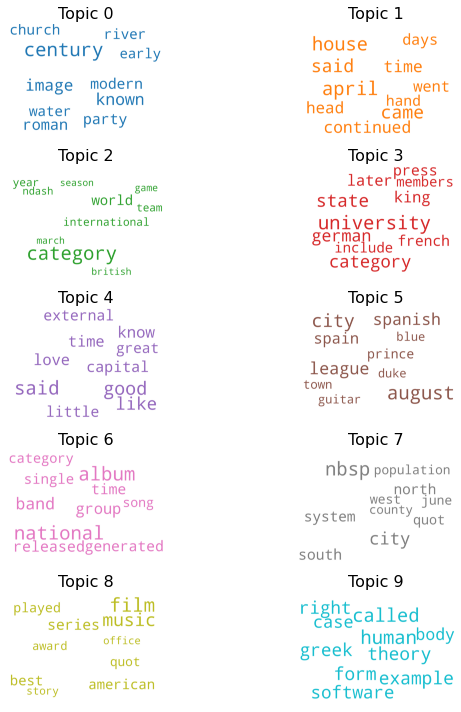

In [24]:
plot_topics_wordcloud(lda_model_en,stop_words_en)

In [25]:
def format_topics_sentences(ldamodel=None, corpus=None, texts=None):
    
    sent_topics_df = pd.DataFrame()

    
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0: 
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    texts.reset_index(inplace=True, drop=True)
    sent_topics_df = pd.concat([sent_topics_df, texts], axis=1)
    return(sent_topics_df)

Topics Representation into the data

In [26]:
df_topic_sents_keywords_en = format_topics_sentences(lda_model_en, bow_corpus_en, text_en)
df_topic_sents_keywords_en.head(10)

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Cleaned_text
0,4.0,0.4110,"said, good, like, know, love, time, capital, l...","[read, book, town, uses, order, pharmacist, ad..."
1,8.0,0.2858,"film, music, series, american, best, played, q...","[recipes, appreciated, family, small, large, r..."
2,4.0,0.4653,"said, good, like, know, love, time, capital, l...","[ease, author, effort, meet, family, writing, ..."
3,4.0,0.3357,"said, good, like, know, love, time, capital, l...","[milady, found, good, vein, anita, blake, base..."
4,4.0,0.3029,"said, good, like, know, love, time, capital, l...","[greece, gentlemen, decided, visit, known, wor..."
5,0.0,0.6201,"century, known, image, roman, party, modern, w...","[tradition, lanfeust, troy, blamed, transition..."
6,4.0,0.4986,"said, good, like, know, love, time, capital, l...","[frankly, volumes, cycle, stars, great, told, ..."
7,4.0,0.7130,"said, good, like, know, love, time, capital, l...","[disappointed, book, read, catalog, situations..."
8,4.0,0.4307,"said, good, like, know, love, time, capital, l...","[disappointed, book, expected, learn, experien..."
9,5.0,0.4178,"august, city, league, spanish, spain, prince, ...","[deafening, silence, olivier, delorme, breaks,..."


# Topics for Spanish documents 

In [27]:
lda_model_es = Lda(bow_corpus_es, num_topics=10, chunksize=1000,id2word=dictionary_es, passes=10,alpha='symmetric',iterations=100,
                    per_word_topics=True)

[2020-08-03][13:11:07][gensim.models.ldamodel][INFO] using symmetric alpha at 0.1
[2020-08-03][13:11:07][gensim.models.ldamodel][INFO] using symmetric eta at 0.1
[2020-08-03][13:11:07][gensim.models.ldamodel][INFO] using serial LDA version on this node
[2020-08-03][13:11:07][gensim.models.ldamodel][INFO] running online (multi-pass) LDA training, 10 topics, 10 passes over the supplied corpus of 5164 documents, updating model once every 1000 documents, evaluating perplexity every 5164 documents, iterating 100x with a convergence threshold of 0.001000
[2020-08-03][13:11:07][gensim.models.ldamodel][INFO] PROGRESS: pass 0, at document #1000/5164
[2020-08-03][13:11:08][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 5164 documents
[2020-08-03][13:11:08][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.007*"vida" + 0.006*"casa" + 0.005*"hombres" + 0.005*"hombre" + 0.005*"cosa" + 0.004*"señor" + 0.004*"dios" + 0.004*"tierra" + 0.004*"pueblo" + 0.004*"mundo"
[

[2020-08-03][13:11:13][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.016*"ciudad" + 0.009*"guerra" + 0.007*"norte" + 0.007*"thumb" + 0.006*"población" + 0.006*"mundial" + 0.005*"alemanes" + 0.005*"años" + 0.005*"siglo" + 0.005*"centro"
[2020-08-03][13:11:13][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.024*"álbum" + 0.023*"disco" + 0.016*"banda" + 0.015*"música" + 0.013*"años" + 0.013*"records" + 0.013*"grupo" + 0.012*"king" + 0.012*"canciones" + 0.012*"actriz"
[2020-08-03][13:11:13][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.009*"forma" + 0.008*"tipo" + 0.008*"tierra" + 0.008*"punto" + 0.006*"número" + 0.006*"lenguaje" + 0.006*"sistema" + 0.005*"objeto" + 0.005*"nombre" + 0.005*"objetos"
[2020-08-03][13:11:13][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.009*"forma" + 0.009*"especies" + 0.009*"agua" + 0.008*"animales" + 0.006*"plantas" + 0.006*"familia" + 0.006*"thumb" + 0.005*"presencia" + 0.005*"color" + 0.005*"años"
[2020-08-03][13:11:13][gensim.models.ldamodel

[2020-08-03][13:11:17][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.010*"forma" + 0.008*"punto" + 0.008*"energía" + 0.008*"espacio" + 0.008*"sistema" + 0.007*"tierra" + 0.007*"objeto" + 0.007*"tipo" + 0.006*"número" + 0.006*"caso"
[2020-08-03][13:11:17][gensim.models.ldamodel][INFO] topic diff=0.272906, rho=0.373613
[2020-08-03][13:11:17][gensim.models.ldamodel][INFO] -7.102 per-word bound, 137.4 perplexity estimate based on a held-out corpus of 164 documents with 40349 words
[2020-08-03][13:11:17][gensim.models.ldamodel][INFO] PROGRESS: pass 1, at document #5164/5164
[2020-08-03][13:11:18][gensim.models.ldamodel][INFO] merging changes from 164 documents into a model of 5164 documents
[2020-08-03][13:11:18][gensim.models.ldamodel][INFO] topic #7 (0.100): 0.020*"guerra" + 0.017*"ejército" + 0.011*"españa" + 0.009*"méxico" + 0.008*"batalla" + 0.008*"fuerzas" + 0.008*"gobierno" + 0.008*"francia" + 0.007*"conquista" + 0.007*"francisco"
[2020-08-03][13:11:18][gensim.models.ldamodel][IN

[2020-08-03][13:11:21][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.028*"ciudad" + 0.011*"población" + 0.010*"provincia" + 0.010*"norte" + 0.009*"thumb" + 0.009*"siglo" + 0.008*"región" + 0.007*"centro" + 0.007*"isla" + 0.007*"capital"
[2020-08-03][13:11:21][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.026*"álbum" + 0.024*"banda" + 0.024*"disco" + 0.023*"música" + 0.019*"grupo" + 0.016*"canción" + 0.014*"canciones" + 0.013*"rock" + 0.013*"películas" + 0.012*"live"
[2020-08-03][13:11:21][gensim.models.ldamodel][INFO] topic #6 (0.100): 0.029*"nbsp" + 0.012*"sistema" + 0.007*"forma" + 0.007*"inglés" + 0.007*"versión" + 0.006*"software" + 0.006*"datos" + 0.006*"desarrollo" + 0.005*"tipo" + 0.005*"código"
[2020-08-03][13:11:21][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.010*"agua" + 0.010*"especies" + 0.009*"forma" + 0.009*"color" + 0.008*"thumb" + 0.006*"familia" + 0.006*"animales" + 0.006*"especie" + 0.005*"años" + 0.005*"plantas"
[2020-08-03][13:11:21][gensim.models.ldam

[2020-08-03][13:11:25][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.015*"años" + 0.014*"serie" + 0.012*"unidos" + 0.012*"john" + 0.011*"película" + 0.010*"premio" + 0.009*"premios" + 0.009*"quot" + 0.007*"york" + 0.007*"isbn"
[2020-08-03][13:11:25][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.035*"equipo" + 0.026*"fútbol" + 0.026*"temporada" + 0.024*"club" + 0.021*"copa" + 0.017*"partido" + 0.015*"liga" + 0.014*"jugador" + 0.014*"partidos" + 0.012*"madrid"
[2020-08-03][13:11:25][gensim.models.ldamodel][INFO] topic diff=0.235610, rho=0.330337
[2020-08-03][13:11:25][gensim.models.ldamodel][INFO] PROGRESS: pass 3, at document #5000/5164
[2020-08-03][13:11:25][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 5164 documents
[2020-08-03][13:11:25][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.010*"agua" + 0.010*"especies" + 0.009*"forma" + 0.009*"color" + 0.008*"thumb" + 0.006*"animales" + 0.006*"familia" + 0.006*"especie" + 0.006*"años" + 0.005

[2020-08-03][13:11:28][gensim.models.ldamodel][INFO] PROGRESS: pass 4, at document #4000/5164
[2020-08-03][13:11:28][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 5164 documents
[2020-08-03][13:11:28][gensim.models.ldamodel][INFO] topic #7 (0.100): 0.022*"guerra" + 0.012*"gobierno" + 0.012*"ejército" + 0.008*"presidente" + 0.008*"partido" + 0.007*"carlos" + 0.007*"españa" + 0.007*"francia" + 0.007*"batalla" + 0.006*"fuerzas"
[2020-08-03][13:11:28][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.025*"álbum" + 0.025*"música" + 0.023*"banda" + 0.023*"disco" + 0.020*"grupo" + 0.017*"canción" + 0.015*"actriz" + 0.013*"canciones" + 0.013*"películas" + 0.013*"rock"
[2020-08-03][13:11:28][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.011*"casa" + 0.007*"hombre" + 0.007*"ojos" + 0.006*"vida" + 0.006*"noche" + 0.005*"mano" + 0.005*"mujer" + 0.005*"señor" + 0.005*"doña" + 0.005*"cabeza"
[2020-08-03][13:11:28][gensim.models.ldamodel][INFO] topic #8 (0.100)

[2020-08-03][13:11:32][gensim.models.ldamodel][INFO] topic #6 (0.100): 0.042*"nbsp" + 0.011*"sistema" + 0.009*"inglés" + 0.007*"versión" + 0.007*"forma" + 0.007*"desarrollo" + 0.006*"datos" + 0.006*"economía" + 0.005*"proceso" + 0.005*"países"
[2020-08-03][13:11:32][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.026*"banda" + 0.026*"álbum" + 0.024*"música" + 0.020*"disco" + 0.020*"grupo" + 0.017*"canción" + 0.013*"canciones" + 0.013*"actriz" + 0.013*"rock" + 0.013*"metal"
[2020-08-03][13:11:32][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.011*"casa" + 0.007*"hombre" + 0.007*"ojos" + 0.006*"vida" + 0.006*"noche" + 0.005*"doña" + 0.005*"mano" + 0.005*"señor" + 0.005*"mujer" + 0.005*"dios"
[2020-08-03][13:11:32][gensim.models.ldamodel][INFO] topic diff=0.170141, rho=0.299289
[2020-08-03][13:11:32][gensim.models.ldamodel][INFO] PROGRESS: pass 5, at document #4000/5164
[2020-08-03][13:11:32][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 5164 docum

[2020-08-03][13:11:34][gensim.models.ldamodel][INFO] topic diff=0.145988, rho=0.286723
[2020-08-03][13:11:34][gensim.models.ldamodel][INFO] PROGRESS: pass 6, at document #3000/5164
[2020-08-03][13:11:35][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 5164 documents
[2020-08-03][13:11:35][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.018*"años" + 0.013*"serie" + 0.012*"unidos" + 0.012*"john" + 0.010*"premio" + 0.009*"película" + 0.008*"york" + 0.008*"inglés" + 0.008*"universidad" + 0.007*"paul"
[2020-08-03][13:11:35][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.011*"casa" + 0.007*"hombre" + 0.007*"ojos" + 0.006*"vida" + 0.006*"noche" + 0.005*"doña" + 0.005*"mano" + 0.005*"señor" + 0.005*"mujer" + 0.005*"dios"
[2020-08-03][13:11:35][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.026*"banda" + 0.026*"álbum" + 0.024*"música" + 0.020*"disco" + 0.020*"grupo" + 0.017*"canción" + 0.013*"actriz" + 0.013*"canciones" + 0.013*"rock" + 0.013*"metal"
[2

[2020-08-03][13:11:37][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.018*"años" + 0.014*"serie" + 0.012*"john" + 0.012*"unidos" + 0.010*"premio" + 0.009*"película" + 0.008*"selección" + 0.008*"inglés" + 0.008*"york" + 0.007*"quot"
[2020-08-03][13:11:37][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.026*"banda" + 0.025*"álbum" + 0.025*"música" + 0.021*"disco" + 0.019*"grupo" + 0.016*"canción" + 0.013*"actriz" + 0.013*"canciones" + 0.012*"películas" + 0.012*"rock"
[2020-08-03][13:11:37][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.011*"casa" + 0.007*"hombre" + 0.007*"ojos" + 0.006*"vida" + 0.006*"noche" + 0.005*"doña" + 0.005*"señor" + 0.005*"mujer" + 0.005*"mano" + 0.005*"dios"
[2020-08-03][13:11:37][gensim.models.ldamodel][INFO] topic diff=0.127052, rho=0.275617
[2020-08-03][13:11:37][gensim.models.ldamodel][INFO] PROGRESS: pass 7, at document #3000/5164
[2020-08-03][13:11:38][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 5164 documents


[2020-08-03][13:11:40][gensim.models.ldamodel][INFO] topic diff=0.159169, rho=0.265709
[2020-08-03][13:11:40][gensim.models.ldamodel][INFO] PROGRESS: pass 8, at document #2000/5164
[2020-08-03][13:11:41][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 5164 documents
[2020-08-03][13:11:41][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.011*"forma" + 0.010*"espacio" + 0.010*"punto" + 0.009*"sistema" + 0.008*"número" + 0.008*"tipo" + 0.008*"elementos" + 0.008*"energía" + 0.007*"caso" + 0.007*"cuerpo"
[2020-08-03][13:11:41][gensim.models.ldamodel][INFO] topic #6 (0.100): 0.043*"nbsp" + 0.012*"sistema" + 0.010*"inglés" + 0.007*"forma" + 0.007*"lenguaje" + 0.007*"versión" + 0.007*"datos" + 0.006*"código" + 0.006*"desarrollo" + 0.005*"países"
[2020-08-03][13:11:41][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.013*"historia" + 0.011*"vida" + 0.011*"dios" + 0.010*"siglo" + 0.010*"libro" + 0.009*"obra" + 0.008*"iglesia" + 0.008*"muerte" + 0.008*"espíritu

[2020-08-03][13:11:44][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.011*"casa" + 0.007*"hombre" + 0.007*"ojos" + 0.006*"vida" + 0.005*"noche" + 0.005*"señor" + 0.005*"doña" + 0.005*"mujer" + 0.005*"mano" + 0.005*"dios"
[2020-08-03][13:11:44][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.011*"agua" + 0.009*"animales" + 0.009*"especies" + 0.009*"forma" + 0.009*"color" + 0.008*"thumb" + 0.007*"presencia" + 0.007*"plantas" + 0.006*"familia" + 0.006*"europa"
[2020-08-03][13:11:44][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.011*"espacio" + 0.011*"forma" + 0.009*"punto" + 0.008*"sistema" + 0.008*"número" + 0.008*"elementos" + 0.008*"tipo" + 0.008*"cuerpo" + 0.007*"caso" + 0.007*"serie"
[2020-08-03][13:11:44][gensim.models.ldamodel][INFO] topic diff=0.153232, rho=0.256799
[2020-08-03][13:11:44][gensim.models.ldamodel][INFO] PROGRESS: pass 9, at document #2000/5164
[2020-08-03][13:11:44][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 5164 docum

[2020-08-03][13:11:47][gensim.models.ldamodel][INFO] topic diff=0.157369, rho=0.256799


In [28]:
for idx, topic in lda_model_es.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

[2020-08-03][13:11:47][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.034*"equipo" + 0.023*"temporada" + 0.023*"fútbol" + 0.022*"club" + 0.019*"copa" + 0.017*"partido" + 0.014*"partidos" + 0.014*"españa" + 0.012*"madrid" + 0.012*"carrera"
[2020-08-03][13:11:47][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.025*"música" + 0.025*"álbum" + 0.023*"banda" + 0.021*"disco" + 0.018*"grupo" + 0.016*"actriz" + 0.015*"canción" + 0.014*"películas" + 0.013*"canciones" + 0.012*"rock"
[2020-08-03][13:11:47][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.012*"forma" + 0.009*"elementos" + 0.009*"punto" + 0.009*"tipo" + 0.009*"número" + 0.009*"sistema" + 0.008*"espacio" + 0.008*"serie" + 0.007*"caso" + 0.007*"energía"
[2020-08-03][13:11:47][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.019*"años" + 0.012*"serie" + 0.012*"john" + 0.012*"unidos" + 0.010*"premio" + 0.008*"paul" + 0.008*"película" + 0.008*"york" + 0.007*"selección" + 0.007*"universidad"
[2020-08-03][13:11:47][gensim.models.lda

Topic: 0 
Words: 0.034*"equipo" + 0.023*"temporada" + 0.023*"fútbol" + 0.022*"club" + 0.019*"copa" + 0.017*"partido" + 0.014*"partidos" + 0.014*"españa" + 0.012*"madrid" + 0.012*"carrera"
Topic: 1 
Words: 0.025*"música" + 0.025*"álbum" + 0.023*"banda" + 0.021*"disco" + 0.018*"grupo" + 0.016*"actriz" + 0.015*"canción" + 0.014*"películas" + 0.013*"canciones" + 0.012*"rock"
Topic: 2 
Words: 0.012*"forma" + 0.009*"elementos" + 0.009*"punto" + 0.009*"tipo" + 0.009*"número" + 0.009*"sistema" + 0.008*"espacio" + 0.008*"serie" + 0.007*"caso" + 0.007*"energía"
Topic: 3 
Words: 0.019*"años" + 0.012*"serie" + 0.012*"john" + 0.012*"unidos" + 0.010*"premio" + 0.008*"paul" + 0.008*"película" + 0.008*"york" + 0.007*"selección" + 0.007*"universidad"
Topic: 4 
Words: 0.011*"casa" + 0.007*"hombre" + 0.006*"vida" + 0.006*"ojos" + 0.006*"noche" + 0.005*"mujer" + 0.005*"mano" + 0.005*"señor" + 0.005*"cabeza" + 0.004*"amor"
Topic: 5 
Words: 0.033*"ciudad" + 0.012*"población" + 0.012*"santa" + 0.012*"provinc

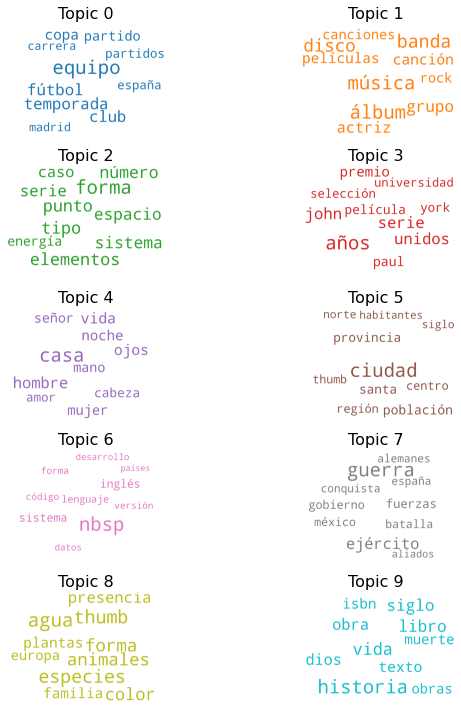

In [29]:
plot_topics_wordcloud(lda_model_es,stop_words_es)

In [30]:
df_topic_sents_keywords_es = format_topics_sentences(lda_model_es, bow_corpus_es, text_es)
df_topic_sents_keywords_es.head(10)

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Cleaned_text
0,4.0,0.9470,"casa, hombre, vida, ojos, noche, mujer, mano, ...","[pafamos, lagunas, palos, indio, fegundo, lleg..."
1,4.0,0.9640,"casa, hombre, vida, ojos, noche, mujer, mano, ...","[puesta, vnos, llanos, vnas, sierras, hallamos..."
2,4.0,0.9357,"casa, hombre, vida, ojos, noche, mujer, mano, ...","[tierra, maior, defde, defembarcamos, hafta, e..."
3,4.0,0.8138,"casa, hombre, vida, ojos, noche, mujer, mano, ...","[xxxvi, hecimos, iglesias, tierra, espantados,..."
4,9.0,0.4656,"historia, vida, libro, siglo, obra, dios, text...","[asombra, imaginar, hubiera, cerebro, bellamen..."
5,4.0,0.8295,"casa, hombre, vida, ojos, noche, mujer, mano, ...","[provecho, venderla, seguirse, vengo, desnudo,..."
6,4.0,0.5750,"casa, hombre, vida, ojos, noche, mujer, mano, ...","[cigüeña, instinto, aburrir, terminaba, confer..."
7,4.0,0.6196,"casa, hombre, vida, ojos, noche, mujer, mano, ...","[venganza, toma, duquesa, haciéndole, ignacio,..."
8,4.0,0.9074,"casa, hombre, vida, ojos, noche, mujer, mano, ...","[cerrar, noche, preguntar, nombre, calle, prop..."
9,4.0,0.8148,"casa, hombre, vida, ojos, noche, mujer, mano, ...","[distraída, corta, vista, lícito, valernos, ex..."


# Topics for French documents

In [31]:
lda_model_fr = Lda(bow_corpus_fr, num_topics=10, chunksize=1000,id2word=dictionary_fr, passes=10,alpha='symmetric',iterations=100,
                    per_word_topics=True)

[2020-08-03][13:12:36][gensim.models.ldamodel][INFO] using symmetric alpha at 0.1
[2020-08-03][13:12:36][gensim.models.ldamodel][INFO] using symmetric eta at 0.1
[2020-08-03][13:12:36][gensim.models.ldamodel][INFO] using serial LDA version on this node
[2020-08-03][13:12:36][gensim.models.ldamodel][INFO] running online (multi-pass) LDA training, 10 topics, 10 passes over the supplied corpus of 8196 documents, updating model once every 1000 documents, evaluating perplexity every 8196 documents, iterating 100x with a convergence threshold of 0.001000
[2020-08-03][13:12:36][gensim.models.ldamodel][INFO] PROGRESS: pass 0, at document #1000/8196
[2020-08-03][13:12:37][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 8196 documents
[2020-08-03][13:12:37][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.041*"livre" + 0.021*"histoire" + 0.015*"lire" + 0.011*"auteur" + 0.010*"roman" + 0.009*"faire" + 0.007*"personnages" + 0.007*"petit" + 0.006*"faut" + 0.006*"v

[2020-08-03][13:12:40][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.019*"ville" + 0.009*"province" + 0.008*"paris" + 0.007*"siège" + 0.006*"habitants" + 0.006*"états" + 0.006*"école" + 0.005*"internationale" + 0.005*"pierre" + 0.005*"utilisée"
[2020-08-03][13:12:40][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.020*"mars" + 0.012*"joueur" + 0.011*"états" + 0.010*"travaux" + 0.009*"site" + 0.009*"image" + 0.008*"décès" + 0.008*"latin" + 0.008*"unis" + 0.008*"juin"
[2020-08-03][13:12:40][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.010*"pays" + 0.009*"centre" + 0.008*"état" + 0.007*"août" + 0.007*"site" + 0.006*"novembre" + 0.006*"nationale" + 0.006*"parti" + 0.005*"html" + 0.005*"octobre"
[2020-08-03][13:12:40][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.014*"championnat" + 0.012*"match" + 0.012*"monde" + 0.011*"actuellement" + 0.011*"groupe" + 0.010*"prix" + 0.010*"théorie" + 0.009*"article" + 0.009*"système" + 0.008*"portugal"
[2020-08-03][13:12:40][gensim.models.l

[2020-08-03][13:12:42][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.009*"pays" + 0.007*"parti" + 0.007*"centre" + 0.006*"état" + 0.006*"août" + 0.006*"pape" + 0.006*"site" + 0.006*"poissons" + 0.005*"novembre" + 0.005*"nationale"
[2020-08-03][13:12:42][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.012*"ville" + 0.008*"cœur" + 0.008*"province" + 0.007*"paris" + 0.006*"siège" + 0.006*"temps" + 0.005*"internationale" + 0.005*"pierre" + 0.004*"états" + 0.004*"smith"
[2020-08-03][13:12:42][gensim.models.ldamodel][INFO] topic diff=0.200576, rho=0.313174
[2020-08-03][13:12:42][gensim.models.ldamodel][INFO] PROGRESS: pass 1, at document #3000/8196
[2020-08-03][13:12:43][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 8196 documents
[2020-08-03][13:12:43][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.036*"famille" + 0.014*"john" + 0.013*"espèces" + 0.012*"genre" + 0.012*"saison" + 0.010*"meilleur" + 0.009*"généralement" + 0.008*"états" + 0.008*"quo

[2020-08-03][13:12:46][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.016*"naissance" + 0.013*"origine" + 0.009*"ligne" + 0.009*"version" + 0.008*"série" + 0.007*"michael" + 0.007*"espace" + 0.007*"données" + 0.006*"généralement" + 0.006*"italien"
[2020-08-03][13:12:46][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.028*"famille" + 0.020*"john" + 0.016*"espèces" + 0.014*"robert" + 0.014*"genre" + 0.013*"thomas" + 0.013*"saison" + 0.010*"quot" + 0.010*"meilleur" + 0.010*"house"
[2020-08-03][13:12:46][gensim.models.ldamodel][INFO] topic #6 (0.100): 0.030*"groupe" + 0.023*"album" + 0.014*"musique" + 0.013*"york" + 0.011*"film" + 0.010*"carrière" + 0.009*"américain" + 0.009*"rock" + 0.008*"années" + 0.008*"canada"
[2020-08-03][13:12:46][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.018*"football" + 0.014*"monde" + 0.013*"finale" + 0.012*"championnat" + 0.012*"exemple" + 0.012*"système" + 0.012*"match" + 0.010*"joueurs" + 0.010*"champion" + 0.009*"saison"
[2020-08-03][13:12:46][ge

[2020-08-03][13:12:48][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.010*"paris" + 0.007*"province" + 0.006*"cœur" + 0.006*"temps" + 0.005*"siège" + 0.005*"pierre" + 0.005*"william" + 0.005*"centre" + 0.004*"école" + 0.004*"faire"
[2020-08-03][13:12:48][gensim.models.ldamodel][INFO] topic #6 (0.100): 0.032*"album" + 0.026*"groupe" + 0.020*"musique" + 0.016*"film" + 0.013*"york" + 0.013*"rock" + 0.010*"carrière" + 0.009*"années" + 0.008*"metal" + 0.008*"empereur"
[2020-08-03][13:12:48][gensim.models.ldamodel][INFO] topic diff=0.252979, rho=0.298861
[2020-08-03][13:12:48][gensim.models.ldamodel][INFO] PROGRESS: pass 2, at document #5000/8196
[2020-08-03][13:12:48][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 8196 documents
[2020-08-03][13:12:48][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.028*"tour" + 0.015*"janvier" + 0.014*"monde" + 0.010*"espagne" + 0.010*"rome" + 0.010*"naissance" + 0.010*"équipe" + 0.009*"britannique" + 0.008*"appelé" +

[2020-08-03][13:12:51][gensim.models.ldamodel][INFO] PROGRESS: pass 3, at document #1000/8196
[2020-08-03][13:12:51][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 8196 documents
[2020-08-03][13:12:51][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.020*"mars" + 0.020*"joueur" + 0.019*"états" + 0.018*"unis" + 0.013*"président" + 0.010*"film" + 0.010*"titre" + 0.009*"site" + 0.009*"millions" + 0.009*"association"
[2020-08-03][13:12:51][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.015*"football" + 0.013*"exemple" + 0.013*"monde" + 0.013*"système" + 0.012*"joueurs" + 0.010*"match" + 0.010*"points" + 0.010*"finale" + 0.010*"saison" + 0.009*"championnat"
[2020-08-03][13:12:51][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.015*"naissance" + 0.012*"série" + 0.010*"origine" + 0.010*"version" + 0.010*"mise" + 0.010*"michael" + 0.009*"scène" + 0.008*"ligne" + 0.008*"généralement" + 0.008*"chanson"
[2020-08-03][13:12:51][gensim.models.ldamodel][INFO] 

[2020-08-03][13:12:53][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.014*"exemple" + 0.013*"système" + 0.013*"football" + 0.012*"championnat" + 0.011*"monde" + 0.011*"nbsp" + 0.010*"fonction" + 0.010*"points" + 0.009*"saison" + 0.009*"match"
[2020-08-03][13:12:53][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.030*"tour" + 0.017*"monde" + 0.016*"janvier" + 0.013*"club" + 0.013*"équipe" + 0.012*"naissance" + 0.011*"espagne" + 0.011*"rome" + 0.011*"jeux" + 0.010*"britannique"
[2020-08-03][13:12:53][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.014*"série" + 0.014*"naissance" + 0.011*"ligne" + 0.011*"version" + 0.011*"origine" + 0.010*"michael" + 0.008*"généralement" + 0.008*"données" + 0.007*"chanson" + 0.007*"italien"
[2020-08-03][13:12:53][gensim.models.ldamodel][INFO] topic diff=0.138069, rho=0.286346
[2020-08-03][13:12:53][gensim.models.ldamodel][INFO] PROGRESS: pass 3, at document #7000/8196
[2020-08-03][13:12:54][gensim.models.ldamodel][INFO] merging changes from 1000 do

[2020-08-03][13:12:55][gensim.models.ldamodel][INFO] topic diff=0.185272, rho=0.275283
[2020-08-03][13:12:55][gensim.models.ldamodel][INFO] PROGRESS: pass 4, at document #3000/8196
[2020-08-03][13:12:55][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 8196 documents
[2020-08-03][13:12:55][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.020*"états" + 0.020*"unis" + 0.019*"mars" + 0.017*"joueur" + 0.013*"président" + 0.013*"disque" + 0.010*"titre" + 0.010*"james" + 0.009*"article" + 0.009*"site"
[2020-08-03][13:12:55][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.039*"film" + 0.038*"famille" + 0.023*"john" + 0.016*"quot" + 0.016*"robert" + 0.016*"rôle" + 0.016*"genre" + 0.014*"acteur" + 0.014*"espèces" + 0.013*"roman"
[2020-08-03][13:12:55][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.029*"tour" + 0.018*"monde" + 0.017*"club" + 0.015*"équipe" + 0.014*"janvier" + 0.013*"naissance" + 0.012*"espagne" + 0.010*"îles" + 0.009*"angleterre" + 0.009*"j

[2020-08-03][13:12:58][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.030*"tour" + 0.021*"club" + 0.020*"monde" + 0.018*"équipe" + 0.015*"janvier" + 0.013*"espagne" + 0.013*"naissance" + 0.010*"angleterre" + 0.010*"jeux" + 0.010*"îles"
[2020-08-03][13:12:58][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.023*"nbsp" + 0.019*"football" + 0.013*"système" + 0.013*"exemple" + 0.012*"saison" + 0.012*"championnat" + 0.012*"match" + 0.011*"joueurs" + 0.010*"points" + 0.009*"bgcolor"
[2020-08-03][13:12:58][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.012*"paris" + 0.007*"temps" + 0.007*"faire" + 0.006*"province" + 0.006*"histoire" + 0.005*"siège" + 0.005*"livre" + 0.005*"voir" + 0.005*"produit" + 0.004*"centre"
[2020-08-03][13:12:58][gensim.models.ldamodel][INFO] topic diff=0.082441, rho=0.275283
[2020-08-03][13:12:58][gensim.models.ldamodel][INFO] -7.561 per-word bound, 188.9 perplexity estimate based on a held-out corpus of 196 documents with 52818 words
[2020-08-03][13:12:58][gens

[2020-08-03][13:13:00][gensim.models.ldamodel][INFO] topic diff=0.209910, rho=0.265410
[2020-08-03][13:13:00][gensim.models.ldamodel][INFO] PROGRESS: pass 5, at document #5000/8196
[2020-08-03][13:13:00][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 8196 documents
[2020-08-03][13:13:00][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.007*"parti" + 0.007*"également" + 0.006*"ordre" + 0.006*"août" + 0.006*"octobre" + 0.006*"nombre" + 0.006*"centre" + 0.006*"état" + 0.005*"nationale" + 0.005*"officiel"
[2020-08-03][13:13:00][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.011*"paris" + 0.007*"faire" + 0.007*"temps" + 0.007*"province" + 0.006*"histoire" + 0.006*"livre" + 0.005*"voir" + 0.005*"produit" + 0.005*"siège" + 0.004*"corps"
[2020-08-03][13:13:00][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.016*"série" + 0.013*"version" + 0.012*"michael" + 0.012*"naissance" + 0.011*"ligne" + 0.010*"prix" + 0.009*"généralement" + 0.009*"origine" + 0.008*

[2020-08-03][13:13:02][gensim.models.ldamodel][INFO] topic #6 (0.100): 0.036*"groupe" + 0.028*"album" + 0.028*"musique" + 0.017*"années" + 0.016*"york" + 0.013*"carrière" + 0.012*"rock" + 0.011*"succès" + 0.010*"empereur" + 0.010*"george"
[2020-08-03][13:13:02][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.007*"parti" + 0.007*"également" + 0.006*"nombre" + 0.006*"août" + 0.005*"pape" + 0.005*"centre" + 0.005*"ordre" + 0.005*"octobre" + 0.005*"nationale" + 0.005*"officiel"
[2020-08-03][13:13:02][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.029*"nbsp" + 0.017*"football" + 0.013*"points" + 0.013*"joueurs" + 0.013*"système" + 0.012*"exemple" + 0.011*"match" + 0.011*"saison" + 0.010*"championnat" + 0.010*"bgcolor"
[2020-08-03][13:13:02][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.027*"états" + 0.025*"unis" + 0.021*"mars" + 0.020*"joueur" + 0.017*"président" + 0.012*"article" + 0.011*"titre" + 0.011*"millions" + 0.011*"site" + 0.010*"association"
[2020-08-03][13:13:02][gensim.

[2020-08-03][13:13:04][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.031*"tour" + 0.022*"monde" + 0.018*"club" + 0.016*"équipe" + 0.016*"janvier" + 0.014*"naissance" + 0.012*"jeux" + 0.011*"espagne" + 0.011*"rome" + 0.011*"grand"
[2020-08-03][13:13:04][gensim.models.ldamodel][INFO] topic diff=0.116409, rho=0.256528
[2020-08-03][13:13:04][gensim.models.ldamodel][INFO] PROGRESS: pass 6, at document #7000/8196
[2020-08-03][13:13:04][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 8196 documents
[2020-08-03][13:13:04][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.030*"états" + 0.028*"unis" + 0.022*"mars" + 0.018*"joueur" + 0.017*"président" + 0.013*"millions" + 0.011*"titre" + 0.011*"article" + 0.011*"américain" + 0.011*"site"
[2020-08-03][13:13:04][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.007*"également" + 0.007*"centre" + 0.006*"août" + 0.006*"nombre" + 0.006*"parti" + 0.006*"octobre" + 0.006*"officiel" + 0.006*"ordre" + 0.005*"nationale

[2020-08-03][13:13:06][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.034*"nbsp" + 0.016*"football" + 0.013*"fonction" + 0.013*"exemple" + 0.012*"système" + 0.012*"points" + 0.011*"joueurs" + 0.010*"match" + 0.009*"point" + 0.009*"bgcolor"
[2020-08-03][13:13:06][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.029*"tour" + 0.022*"monde" + 0.020*"club" + 0.018*"équipe" + 0.014*"janvier" + 0.013*"naissance" + 0.012*"espagne" + 0.011*"grand" + 0.010*"angleterre" + 0.010*"jeux"
[2020-08-03][13:13:06][gensim.models.ldamodel][INFO] topic #6 (0.100): 0.041*"album" + 0.036*"groupe" + 0.031*"musique" + 0.018*"rock" + 0.016*"années" + 0.014*"york" + 0.011*"carrière" + 0.009*"succès" + 0.008*"george" + 0.008*"empereur"
[2020-08-03][13:13:06][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.026*"états" + 0.025*"unis" + 0.020*"mars" + 0.018*"joueur" + 0.016*"président" + 0.013*"disque" + 0.012*"article" + 0.011*"titre" + 0.010*"millions" + 0.010*"james"
[2020-08-03][13:13:06][gensim.models.lda

[2020-08-03][13:13:08][gensim.models.ldamodel][INFO] topic diff=0.064369, rho=0.248483
[2020-08-03][13:13:09][gensim.models.ldamodel][INFO] -7.539 per-word bound, 186.0 perplexity estimate based on a held-out corpus of 196 documents with 52818 words
[2020-08-03][13:13:09][gensim.models.ldamodel][INFO] PROGRESS: pass 7, at document #8196/8196
[2020-08-03][13:13:09][gensim.models.ldamodel][INFO] merging changes from 196 documents into a model of 8196 documents
[2020-08-03][13:13:09][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.033*"ville" + 0.018*"nord" + 0.015*"saint" + 0.012*"image" + 0.011*"région" + 0.011*"partie" + 0.011*"ouest" + 0.010*"site" + 0.008*"coupe" + 0.008*"grande"
[2020-08-03][13:13:09][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.029*"états" + 0.027*"unis" + 0.022*"mars" + 0.020*"joueur" + 0.017*"président" + 0.013*"article" + 0.011*"millions" + 0.011*"titre" + 0.011*"américain" + 0.011*"site"
[2020-08-03][13:13:09][gensim.models.ldamodel][INFO] topic #2 (0.10

[2020-08-03][13:13:10][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.008*"également" + 0.007*"centre" + 0.007*"parti" + 0.007*"nombre" + 0.007*"ordre" + 0.006*"langue" + 0.006*"octobre" + 0.006*"août" + 0.006*"officiel" + 0.005*"nationale"
[2020-08-03][13:13:10][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.032*"nbsp" + 0.016*"football" + 0.012*"exemple" + 0.012*"système" + 0.012*"fonction" + 0.011*"points" + 0.011*"match" + 0.010*"championnat" + 0.010*"forme" + 0.009*"bgcolor"
[2020-08-03][13:13:10][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.029*"états" + 0.026*"unis" + 0.020*"mars" + 0.018*"président" + 0.017*"joueur" + 0.012*"article" + 0.012*"millions" + 0.011*"international" + 0.011*"américain" + 0.011*"groupes"
[2020-08-03][13:13:10][gensim.models.ldamodel][INFO] topic diff=0.111506, rho=0.241149
[2020-08-03][13:13:10][gensim.models.ldamodel][INFO] PROGRESS: pass 8, at document #6000/8196
[2020-08-03][13:13:11][gensim.models.ldamodel][INFO] merging changes from 100

[2020-08-03][13:13:12][gensim.models.ldamodel][INFO] topic diff=0.176937, rho=0.234429
[2020-08-03][13:13:12][gensim.models.ldamodel][INFO] PROGRESS: pass 9, at document #2000/8196
[2020-08-03][13:13:12][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 8196 documents
[2020-08-03][13:13:12][gensim.models.ldamodel][INFO] topic #6 (0.100): 0.038*"groupe" + 0.037*"album" + 0.030*"musique" + 0.017*"années" + 0.016*"york" + 0.014*"rock" + 0.012*"carrière" + 0.010*"succès" + 0.009*"george" + 0.009*"empereur"
[2020-08-03][13:13:12][gensim.models.ldamodel][INFO] topic #7 (0.100): 0.023*"france" + 0.023*"guerre" + 0.020*"jean" + 0.014*"politique" + 0.014*"louis" + 0.014*"saint" + 0.012*"jacques" + 0.011*"fils" + 0.011*"mort" + 0.010*"charles"
[2020-08-03][13:13:12][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.072*"film" + 0.025*"famille" + 0.020*"john" + 0.016*"rôle" + 0.016*"acteur" + 0.015*"robert" + 0.014*"cinéma" + 0.014*"roman" + 0.014*"scène" + 0.014*"

[2020-08-03][13:13:15][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.035*"ville" + 0.019*"nord" + 0.016*"saint" + 0.012*"image" + 0.012*"région" + 0.011*"ouest" + 0.011*"partie" + 0.010*"site" + 0.008*"habitants" + 0.008*"nbsp"
[2020-08-03][13:13:15][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.056*"film" + 0.033*"famille" + 0.024*"john" + 0.019*"robert" + 0.017*"acteur" + 0.016*"rôle" + 0.015*"thomas" + 0.014*"père" + 0.014*"personnage" + 0.013*"femme"
[2020-08-03][13:13:15][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.019*"série" + 0.014*"prix" + 0.012*"version" + 0.012*"naissance" + 0.010*"ligne" + 0.010*"paul" + 0.010*"michael" + 0.010*"généralement" + 0.009*"origine" + 0.008*"michel"
[2020-08-03][13:13:15][gensim.models.ldamodel][INFO] topic diff=0.081656, rho=0.234429
[2020-08-03][13:13:15][gensim.models.ldamodel][INFO] PROGRESS: pass 9, at document #8000/8196
[2020-08-03][13:13:15][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 81

In [32]:
for idx, topic in lda_model_fr.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

[2020-08-03][13:13:16][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.030*"états" + 0.027*"unis" + 0.021*"mars" + 0.020*"joueur" + 0.018*"président" + 0.014*"article" + 0.012*"américain" + 0.012*"millions" + 0.011*"international" + 0.011*"titre"
[2020-08-03][13:13:16][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.037*"nbsp" + 0.019*"football" + 0.015*"points" + 0.014*"joueurs" + 0.013*"système" + 0.012*"match" + 0.012*"exemple" + 0.011*"championnat" + 0.011*"bgcolor" + 0.010*"fonction"
[2020-08-03][13:13:16][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.017*"série" + 0.013*"prix" + 0.012*"naissance" + 0.012*"version" + 0.012*"michel" + 0.011*"paul" + 0.011*"mise" + 0.010*"généralement" + 0.010*"michael" + 0.009*"ligne"
[2020-08-03][13:13:16][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.008*"également" + 0.007*"centre" + 0.007*"nombre" + 0.006*"recherche" + 0.006*"parti" + 0.006*"officiel" + 0.006*"août" + 0.006*"langue" + 0.006*"octobre" + 0.006*"ordre"
[2020-08-03][13:

Topic: 0 
Words: 0.030*"états" + 0.027*"unis" + 0.021*"mars" + 0.020*"joueur" + 0.018*"président" + 0.014*"article" + 0.012*"américain" + 0.012*"millions" + 0.011*"international" + 0.011*"titre"
Topic: 1 
Words: 0.037*"nbsp" + 0.019*"football" + 0.015*"points" + 0.014*"joueurs" + 0.013*"système" + 0.012*"match" + 0.012*"exemple" + 0.011*"championnat" + 0.011*"bgcolor" + 0.010*"fonction"
Topic: 2 
Words: 0.017*"série" + 0.013*"prix" + 0.012*"naissance" + 0.012*"version" + 0.012*"michel" + 0.011*"paul" + 0.011*"mise" + 0.010*"généralement" + 0.010*"michael" + 0.009*"ligne"
Topic: 3 
Words: 0.008*"également" + 0.007*"centre" + 0.007*"nombre" + 0.006*"recherche" + 0.006*"parti" + 0.006*"officiel" + 0.006*"août" + 0.006*"langue" + 0.006*"octobre" + 0.006*"ordre"
Topic: 4 
Words: 0.053*"film" + 0.028*"famille" + 0.023*"john" + 0.018*"rôle" + 0.017*"acteur" + 0.016*"robert" + 0.015*"père" + 0.015*"scène" + 0.013*"personnage" + 0.013*"thomas"
Topic: 5 
Words: 0.033*"ville" + 0.018*"nord" + 0.0

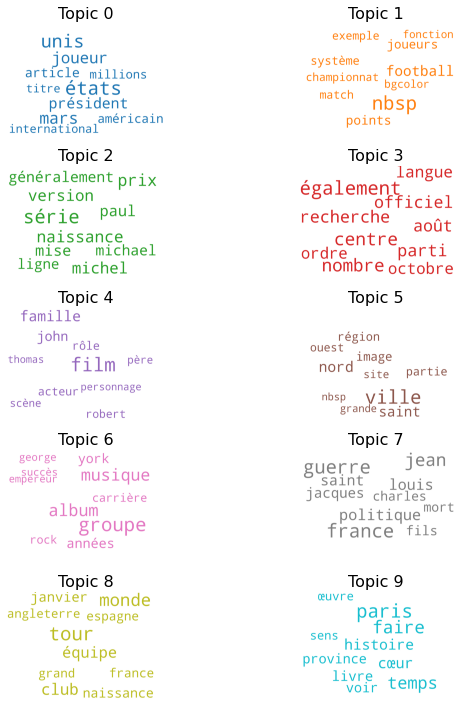

In [33]:
plot_topics_wordcloud(lda_model_fr,stop_words_fr)

In [34]:
df_topic_sents_keywords_fr = format_topics_sentences(lda_model_fr, bow_corpus_fr, text_fr)
df_topic_sents_keywords_fr.head(10)

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Cleaned_text
0,6.0,0.4076,"groupe, album, musique, années, york, carrière...","[aimé, premiers, albums, petit, abordaient, am..."
1,9.0,0.5249,"paris, faire, temps, cœur, histoire, livre, vo...","[joins, commentaires, satisfaits, dirait, scén..."
2,9.0,0.6296,"paris, faire, temps, cœur, histoire, livre, vo...","[parution, livre, rencontré, audience, suscite..."
3,9.0,0.9500,"paris, faire, temps, cœur, histoire, livre, vo...","[découvre, douglas, kennedy, aimerais, expliqu..."
4,9.0,0.7380,"paris, faire, temps, cœur, histoire, livre, vo...","[acheté, livre, lecture, commentaires, goûts, ..."
5,9.0,0.8053,"paris, faire, temps, cœur, histoire, livre, vo...","[pratiquement, livres, isabel, wolff, jamais, ..."
6,9.0,0.8175,"paris, faire, temps, cœur, histoire, livre, vo...","[livre, visionné, film, cinéma, bonne, perform..."
7,9.0,0.7832,"paris, faire, temps, cœur, histoire, livre, vo...","[livre, autant, surpris, histoire, rebondissem..."
8,9.0,0.8131,"paris, faire, temps, cœur, histoire, livre, vo...","[incroyable, pensais, exister, auteur, passe, ..."
9,9.0,0.5483,"paris, faire, temps, cœur, histoire, livre, vo...","[page, donne, livre, dédié, george, romero, cr..."
